Join the data from Part 1 with the data from Part 2 to create a new dataframe.

In [1]:
import requests
from IPython.display import JSON

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import sqlite3
from sqlite3 import Error

### I have joined the data and converted it into a csv in Part 2. Loading the data from csv.

In [3]:
df_fs = pd.read_csv("fsrestaurant_info.csv")

Provide a visualization that you used as part of your EDA process. Explain the initial pattern or relationship you discoved through this visualization. 

In [4]:
# using this function, we can find out to see if we have any values that doesn't make any sense.
df_fs.describe()

,Unnamed: 0,popularity,price,rating,latitude,longitude,distance,bikes
count,4517.000000,4272.000000,3974.000000,3577.000000,4517.000000,4517.000000,4.517000e+03,4517.000000
mean,23.093425,0.926420,1.743080,7.723344,43.660087,-79.392255,1.264272e+03,9.377020
std,14.093942,0.106487,0.728874,0.896270,0.014348,0.038613,4.181579e+04,8.810762
min,0.000000,0.000262,1.000000,4.600000,43.629265,-79.476965,1.000000e+01,0.000000
25%,11.000000,0.923306,1.000000,7.200000,43.648776,-79.417535,4.510000e+02,2.000000
50%,23.000000,0.948002,2.000000,7.900000,43.658703,-79.393336,6.750000e+02,7.000000
75%,35.000000,0.968785,2.000000,8.400000,43.669364,-79.379508,8.570000e+02,14.000000
max,49.000000,0.999900,4.000000,9.400000,43.716985,-79.279413,2.810971e+06,49.000000


In [5]:
df_fs.isnull().sum()

Unnamed: 0            0
name                  0
popularity          245
price               543
rating              940
categories_name       0
latitude              0
longitude             0
distance              0
credit_card        1738
beer               3392
outdoor_seating    1743
bikes                 0
dtype: int64

In [6]:
# dropping the id's
df_fs.drop(['Unnamed: 0'], axis=1, inplace = True)


In [7]:
# Dropping duplicates
df_fs.drop_duplicates(subset=['name', 'latitude', 'longitude'], keep='first', inplace = True)

In [8]:
df_fs.describe()

,popularity,price,rating,latitude,longitude,distance,bikes
count,1341.000000,1245.000000,995.000000,1515.000000,1515.000000,1.515000e+03,1515.000000
mean,0.902213,1.695582,7.490653,43.663736,-79.390054,2.520471e+03,9.639604
std,0.137864,0.717055,0.996676,0.017683,0.044721,7.220213e+04,8.624457
min,0.000262,1.000000,4.600000,43.629265,-79.476965,2.300000e+01,0.000000
25%,0.899978,1.000000,6.700000,43.649622,-79.421476,4.860000e+02,2.000000
50%,0.938430,2.000000,7.700000,43.662960,-79.396141,7.070000e+02,8.000000
75%,0.960268,2.000000,8.300000,43.674542,-79.363234,8.630000e+02,17.000000
max,0.999900,4.000000,9.400000,43.716985,-79.279413,2.810971e+06,49.000000


There were 3176 duplicates removed.

<AxesSubplot:xlabel='popularity', ylabel='distance'>

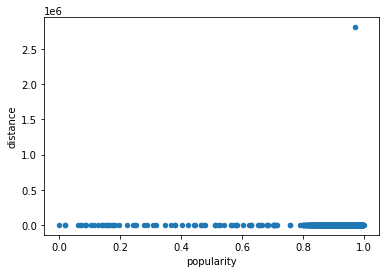

In [9]:
df_fs.plot(x='popularity', y='distance', kind='scatter')
# We have an outlier in this graph

In [10]:
upper = df_fs['distance'] >= 1200
print(df_fs[upper])

                        name  popularity  price  rating  \
1408  Good Earth Coffeehouse    0.971751    1.0     8.1   
2910         Black Oaks Cafe    0.800061    1.0     NaN   
2975    Glory Hole Doughnuts    0.906972    1.0     8.3   
4228     Mother Cocktail Bar    0.870316    3.0     7.3   

             categories_name   latitude  longitude  distance credit_card beer  \
1408  Arts and Entertainment  43.700042 -79.399820   2810971         NaN  NaN   
2910                   Diner  43.645126 -79.456083      1928         NaN  NaN   
2975                  Bakery  43.639808 -79.441300      4341        True  NaN   
4228            Cocktail Bar  43.645243 -79.414499      1236         NaN  NaN   

     outdoor_seating  bikes  
1408             NaN      0  
2910             NaN     24  
2975           False     13  
4228             NaN     15  


<AxesSubplot:xlabel='distance', ylabel='popularity'>

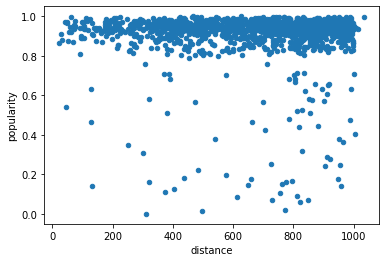

In [11]:
df_fs.drop(index=[1408,2910,2975,4228], inplace = True)
df_fs.plot(x='distance', y='popularity', kind='scatter')

<AxesSubplot:xlabel='rating', ylabel='popularity'>

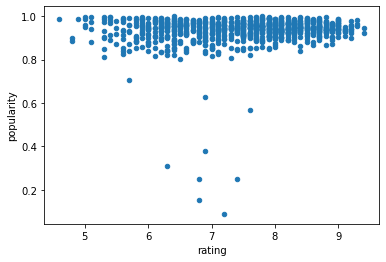

In [12]:
df_fs.plot(x='rating', y='popularity', kind='scatter')

(array([  8.,  22.,  64., 120.,  83., 126., 196., 193., 135.,  45.]),
 array([4.6 , 5.08, 5.56, 6.04, 6.52, 7.  , 7.48, 7.96, 8.44, 8.92, 9.4 ]),
 <BarContainer object of 10 artists>)

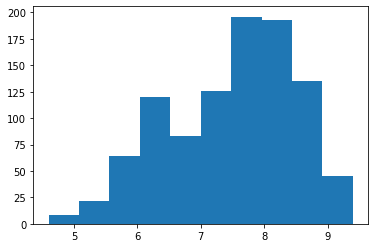

In [13]:
plt.hist(df_fs['rating'],bins=10)

(array([537.,   0.,   0., 571.,   0.,   0., 106.,   0.,   0.,  27.]),
 array([1. , 1.3, 1.6, 1.9, 2.2, 2.5, 2.8, 3.1, 3.4, 3.7, 4. ]),
 <BarContainer object of 10 artists>)

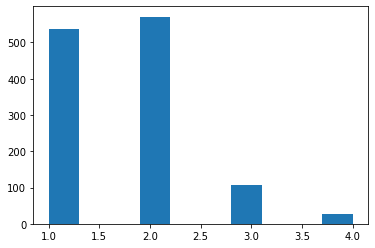

In [14]:
plt.hist(df_fs['price'],bins=10)

<AxesSubplot:xlabel='latitude', ylabel='longitude'>

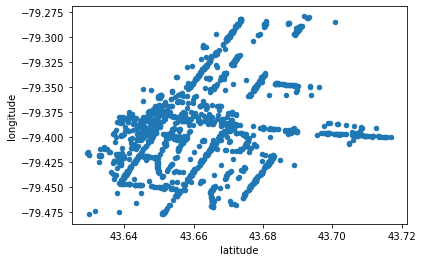

In [15]:
df_fs.plot(x='latitude', y='longitude', kind='scatter')

# Database

Put all your results in an SQLite3 database (remember, SQLite stores its databases as files in your local machine - make sure to create your database in your project's data/ directory!)

In [16]:
def create_connection(path):
    connection = None
    try:
        connection = sqlite3.connect(path)
        print("Connection to SQLite DB successful")
    except Error as e:
        print(f"The error '{e}' occurred")

    return connection

In [17]:
conn = create_connection("sm_app.sqlite")

Connection to SQLite DB successful


In [18]:
restaurant_table = """
CREATE TABLE IF NOT EXISTS users (
  id INTEGER PRIMARY KEY AUTOINCREMENT,
  name TEXT NOT NULL,
  popularity FLOAT,
  price FLOAT,
  rating FLOAT,
  categories_name TEXT,
  latitude FLOAT NOT NULL,
  longitude FLOAT NOT NULL,
  distance INTEGER NOT NULL,
  credit_card BOOL,
  beer BOOL,
  outdoor_seating BOOL
);
"""
conn.execute(restaurant_table)

In [19]:
table_name = "restaurant"
df_fs.to_sql(table_name,conn,if_exists='replace',index=False)
conn.commit()
conn.close()

Look at the data before and after the join to validate your data.

In [20]:
connection = sqlite3.connect("sm_app.sqlite")
crsr = connection.cursor()
crsr.execute("SELECT COUNT(*) FROM restaurant")

In [21]:
restaurant_sql = crsr.fetchall()

In [22]:
# Number of restaurants in SQLite
print(restaurant_sql[0][0])

1511


In [23]:
# Number of restaurants in DataFrame
print(len(df_fs))

1511


In [24]:
print(restaurant_sql[0][0]==len(df_fs))

True
